# **Assignment 6 PART A**
# **Implementing complete autograd framework in python using numpy  and building mnist classifier using the autograd framework**

### Arpitha Gurumurthy

### **Data :** 
Kaggle dataset https://www.kaggle.com/c/digit-recognizer/data </br>
The files train.csv and test.csv contains gray-scale images of hand-drawn digits 0 through 9.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

* The train.csv has 785 columns. The first column called "label", is the hand drawn digit. The rest of the columns contain the pixel-values of the associated image.
* The test.csv is the same as the training set, except that it does not contain the "label" column.


## **Data Collection**
Here, we are  authorizing google drive to access the kaggle datasets and import it to the colab as shown below.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/258_HW3/digit_recognizer_data

/content/gdrive/My Drive/258_HW3/digit_recognizer_data


In [ ]:
## Required only on the first run to get the datasets on to the drive
## !kaggle competitions download -c digit-recognizer
## !mkdir digit_recognizer_data 
## !mv *.zip digit_recognizer_data/
## %cd digit_recognizer_data/
## !unzip test.csv.zip
## !unzip train.csv.zip

In [ ]:
## Importing the required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

##reading the csv into the dataframe 'train'
train = pd.read_csv("train.csv")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


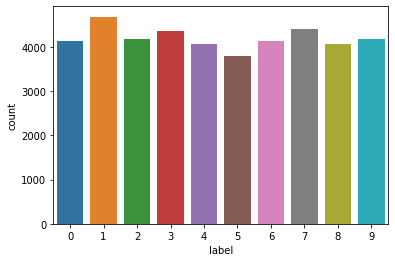

In [ ]:
##Countplot to check the data distribtion
sns.countplot(train['label'])

In [ ]:
Y_train = train["label"]

In [ ]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [ ]:
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

In [ ]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

In [ ]:
# Normalize the data
X_train = X_train / 255.0

In [ ]:
##Split the dataframe into train and test in the ratio 80 and 20 - train and test
##Set the random seed
random_seed = 2
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

In [ ]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
30613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Implementing the autograd framework -**

Reference:
https://github.com/iamtrask/Grokking-Deep-Learning/blob/master/Chapter13%20-%20Intro%20to%20Automatic%20Differentiation%20-%20Let's%20Build%20A%20Deep%20Learning%20Framework.ipynb

### **Introduction to Tensors**


In [ ]:
import numpy as np
class Tensor (object):
    def __init__(self, data):
        self.data = np.array(data)
    def __add__(self, other):
        return Tensor(self.data + other.data)
    def __repr__(self):
        return str(self.data.__repr__())
    def __str__(self):
        return str(self.data.__str__())
    
x = Tensor([1,2,3,4,5])
print(x)

y = x + x
print(y)

[1 2 3 4 5]
[ 2  4  6  8 10]


### **Introduction to Autograd**

In [ ]:
import numpy as np

class Tensor (object):
    def __init__(self, data, creators=None, creation_op = None):
        self.data = np.array(data)
        self.creation_op = creation_op
        self.creators = creators
        self.grad = None
    
    def backward(self, grad):
        self.grad = grad
        
        if(self.creation_op == "add"):
            self.creators[0].backward(grad)
            self.creators[1].backward(grad)

    def __add__(self, other):
        return Tensor(self.data + other.data,  creators=[self,other], creation_op="add")
    
    def __repr__(self):
        return str(self.data.__repr__())
    
    def __str__(self):
        return str(self.data.__str__())
    
x = Tensor([1,2,3,4,5])
y = Tensor([2,2,2,2,2])

z = x + y
z.backward(Tensor(np.array([1,1,1,1,1])))

In [ ]:
print(x.grad)
print(y.grad)
print(z.creators)
print(z.creation_op)

[1 1 1 1 1]
[1 1 1 1 1]
[array([1, 2, 3, 4, 5]), array([2, 2, 2, 2, 2])]
add


In [ ]:
a = Tensor([1,2,3,4,5])
b = Tensor([2,2,2,2,2])
c = Tensor([5,4,3,2,1])
d = Tensor([-1,-2,-3,-4,-5])

e = a + b
f = c + d
g = e + f

g.backward(Tensor(np.array([1,1,1,1,1])))

print(a.grad)


[1 1 1 1 1]


### **Tensors That Are Used Multiple Times**

In [ ]:
a = Tensor([1,2,3,4,5])
b = Tensor([2,2,2,2,2])
c = Tensor([5,4,3,2,1])

d = a + b
e = b + c
f = d + e
f.backward(Tensor(np.array([1,1,1,1,1])))

b.grad.data == np.array([2,2,2,2,2])

array([False, False, False, False, False])

### **Upgrading Autograd to Support Multiple Tensors**

In [ ]:
import numpy as np

class Tensor (object):
    
    def __init__(self,data,
                 autograd=False,
                 creators=None,
                 creation_op=None,
                 id=None):
        
        self.data = np.array(data)
        self.autograd = autograd
        self.grad = None
        if(id is None):
            self.id = np.random.randint(0,100000)
        else:
            self.id = id
        
        self.creators = creators
        self.creation_op = creation_op
        self.children = {}
        
        if(creators is not None):
            for c in creators:
                if(self.id not in c.children):
                    c.children[self.id] = 1
                else:
                    c.children[self.id] += 1

    def all_children_grads_accounted_for(self):
        for id,cnt in self.children.items():
            if(cnt != 0):
                return False
        return True        
        
    def backward(self,grad=None, grad_origin=None):
        if(self.autograd):
            if(grad is None):
                grad = FloatTensor(np.ones_like(self.data))
            
            if(grad_origin is not None):
                if(self.children[grad_origin.id] == 0):
                    raise Exception("cannot backprop more than once")
                else:
                    self.children[grad_origin.id] -= 1

            if(self.grad is None):
                self.grad = grad
            else:
                self.grad += grad
            
            # grads must not have grads of their own
            assert grad.autograd == False
            
            # only continue backpropping if there's something to
            # backprop into and if all gradients (from children)
            # are accounted for override waiting for children if
            # "backprop" was called on this variable directly
            if(self.creators is not None and 
               (self.all_children_grads_accounted_for() or 
                grad_origin is None)):

                if(self.creation_op == "add"):
                    self.creators[0].backward(self.grad, self)
                    self.creators[1].backward(self.grad, self)
                    
    def __add__(self, other):
        if(self.autograd and other.autograd):
            return Tensor(self.data + other.data,
                          autograd=True,
                          creators=[self,other],
                          creation_op="add")
        return Tensor(self.data + other.data)

    def __repr__(self):
        return str(self.data.__repr__())
    
    def __str__(self):
        return str(self.data.__str__())  
    
a = Tensor([1,2,3,4,5], autograd=True)
b = Tensor([2,2,2,2,2], autograd=True)
c = Tensor([5,4,3,2,1], autograd=True)

d = a + b
e = b + c
f = d + e

f.backward(Tensor(np.array([1,1,1,1,1])))

print(b.grad.data == np.array([2,2,2,2,2]))

[ True  True  True  True  True]


### **Add Support for Negation**

In [ ]:
import numpy as np

class Tensor (object):
    
    def __init__(self,data,
                 autograd=False,
                 creators=None,
                 creation_op=None,
                 id=None):
        
        self.data = np.array(data)
        self.autograd = autograd
        self.grad = None
        if(id is None):
            self.id = np.random.randint(0,100000)
        else:
            self.id = id
        
        self.creators = creators
        self.creation_op = creation_op
        self.children = {}
        
        if(creators is not None):
            for c in creators:
                if(self.id not in c.children):
                    c.children[self.id] = 1
                else:
                    c.children[self.id] += 1

    def all_children_grads_accounted_for(self):
        for id,cnt in self.children.items():
            if(cnt != 0):
                return False
        return True        
        
    def backward(self,grad=None, grad_origin=None):
        if(self.autograd):
            if(grad is None):
                grad = FloatTensor(np.ones_like(self.data))
            
            if(grad_origin is not None):
                if(self.children[grad_origin.id] == 0):
                    raise Exception("cannot backprop more than once")
                else:
                    self.children[grad_origin.id] -= 1

            if(self.grad is None):
                self.grad = grad
            else:
                self.grad += grad
            
            # grads must not have grads of their own
            assert grad.autograd == False
            
            # only continue backpropping if there's something to
            # backprop into and if all gradients (from children)
            # are accounted for override waiting for children if
            # "backprop" was called on this variable directly
            if(self.creators is not None and 
               (self.all_children_grads_accounted_for() or 
                grad_origin is None)):

                if(self.creation_op == "add"):
                    self.creators[0].backward(self.grad, self)
                    self.creators[1].backward(self.grad, self)
                    
                if(self.creation_op == "neg"):
                    self.creators[0].backward(self.grad.__neg__())
                    
    def __add__(self, other):
        if(self.autograd and other.autograd):
            return Tensor(self.data + other.data,
                          autograd=True,
                          creators=[self,other],
                          creation_op="add")
        return Tensor(self.data + other.data)

    def __neg__(self):
        if(self.autograd):
            return Tensor(self.data * -1,
                          autograd=True,
                          creators=[self],
                          creation_op="neg")
        return Tensor(self.data * -1) 
    
    def __repr__(self):
        return str(self.data.__repr__())
    
    def __str__(self):
        return str(self.data.__str__())  
    
a = Tensor([1,2,3,4,5], autograd=True)
b = Tensor([2,2,2,2,2], autograd=True)
c = Tensor([5,4,3,2,1], autograd=True)

d = a + (-b)
e = (-b) + c
f = d + e

f.backward(Tensor(np.array([1,1,1,1,1])))

print(b.grad.data == np.array([-2,-2,-2,-2,-2]))

[ True  True  True  True  True]


### **Add Support for Additional Functions**

In [ ]:
import numpy as np

class Tensor (object):
    
    def __init__(self,data,
                 autograd=False,
                 creators=None,
                 creation_op=None,
                 id=None):
        
        self.data = np.array(data)
        self.autograd = autograd
        self.grad = None
        if(id is None):
            self.id = np.random.randint(0,100000)
        else:
            self.id = id
        
        self.creators = creators
        self.creation_op = creation_op
        self.children = {}
        
        if(creators is not None):
            for c in creators:
                if(self.id not in c.children):
                    c.children[self.id] = 1
                else:
                    c.children[self.id] += 1

    def all_children_grads_accounted_for(self):
        for id,cnt in self.children.items():
            if(cnt != 0):
                return False
        return True 
        
    def backward(self,grad=None, grad_origin=None):
        if(self.autograd):
 
            if(grad is None):
                grad = Tensor(np.ones_like(self.data))

            if(grad_origin is not None):
                if(self.children[grad_origin.id] == 0):
                    raise Exception("cannot backprop more than once")
                else:
                    self.children[grad_origin.id] -= 1

            if(self.grad is None):
                self.grad = grad
            else:
                self.grad += grad
            
            # grads must not have grads of their own
            assert grad.autograd == False
            
            # only continue backpropping if there's something to
            # backprop into and if all gradients (from children)
            # are accounted for override waiting for children if
            # "backprop" was called on this variable directly
            if(self.creators is not None and 
               (self.all_children_grads_accounted_for() or 
                grad_origin is None)):

                if(self.creation_op == "add"):
                    self.creators[0].backward(self.grad, self)
                    self.creators[1].backward(self.grad, self)
                    
                if(self.creation_op == "sub"):
                    self.creators[0].backward(Tensor(self.grad.data), self)
                    self.creators[1].backward(Tensor(self.grad.__neg__().data), self)

                if(self.creation_op == "mul"):
                    new = self.grad * self.creators[1]
                    self.creators[0].backward(new , self)
                    new = self.grad * self.creators[0]
                    self.creators[1].backward(new, self)                    
                    
                if(self.creation_op == "mm"):
                    c0 = self.creators[0]
                    c1 = self.creators[1]
                    new = self.grad.mm(c1.transpose())
                    c0.backward(new)
                    new = self.grad.transpose().mm(c0).transpose()
                    c1.backward(new)
                    
                if(self.creation_op == "transpose"):
                    self.creators[0].backward(self.grad.transpose())

                if("sum" in self.creation_op):
                    dim = int(self.creation_op.split("_")[1])
                    self.creators[0].backward(self.grad.expand(dim,
                                                               self.creators[0].data.shape[dim]))

                if("expand" in self.creation_op):
                    dim = int(self.creation_op.split("_")[1])
                    self.creators[0].backward(self.grad.sum(dim))
                    
                if(self.creation_op == "neg"):
                    self.creators[0].backward(self.grad.__neg__())
                    
    def __add__(self, other):
        if(self.autograd and other.autograd):
            return Tensor(self.data + other.data,
                          autograd=True,
                          creators=[self,other],
                          creation_op="add")
        return Tensor(self.data + other.data)

    def __neg__(self):
        if(self.autograd):
            return Tensor(self.data * -1,
                          autograd=True,
                          creators=[self],
                          creation_op="neg")
        return Tensor(self.data * -1)
    
    def __sub__(self, other):
        if(self.autograd and other.autograd):
            return Tensor(self.data - other.data,
                          autograd=True,
                          creators=[self,other],
                          creation_op="sub")
        return Tensor(self.data - other.data)
    
    def __mul__(self, other):
        if(self.autograd and other.autograd):
            return Tensor(self.data * other.data,
                          autograd=True,
                          creators=[self,other],
                          creation_op="mul")
        return Tensor(self.data * other.data)    

    def sum(self, dim):
        if(self.autograd):
            return Tensor(self.data.sum(dim),
                          autograd=True,
                          creators=[self],
                          creation_op="sum_"+str(dim))
        return Tensor(self.data.sum(dim))
    
    def expand(self, dim,copies):

        trans_cmd = list(range(0,len(self.data.shape)))
        trans_cmd.insert(dim,len(self.data.shape))
        new_data = self.data.repeat(copies).reshape(list(self.data.shape) + [copies]).transpose(trans_cmd)
        
        if(self.autograd):
            return Tensor(new_data,
                          autograd=True,
                          creators=[self],
                          creation_op="expand_"+str(dim))
        return Tensor(new_data)
    
    def transpose(self):
        if(self.autograd):
            return Tensor(self.data.transpose(),
                          autograd=True,
                          creators=[self],
                          creation_op="transpose")
        
        return Tensor(self.data.transpose())
    
    def mm(self, x):
        if(self.autograd):
            return Tensor(self.data.dot(x.data),
                          autograd=True,
                          creators=[self,x],
                          creation_op="mm")
        return Tensor(self.data.dot(x.data))
    
    def __repr__(self):
        return str(self.data.__repr__())
    
    def __str__(self):
        return str(self.data.__str__())  
    
a = Tensor([1,2,3,4,5], autograd=True)
b = Tensor([2,2,2,2,2], autograd=True)
c = Tensor([5,4,3,2,1], autograd=True)

d = a + b
e = b + c
f = d + e

f.backward(Tensor(np.array([1,1,1,1,1])))

print(b.grad.data == np.array([2,2,2,2,2]))


[ True  True  True  True  True]


### **Notes on Sum and Expand**

In [ ]:
x = Tensor(np.array([[1,2,3],
                     [4,5,6]]))

In [ ]:
x.sum(0)

array([5, 7, 9])

In [ ]:
x.sum(1)

array([ 6, 15])

In [ ]:
x.expand(dim=2, copies=4)

array([[[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3]],

       [[4, 4, 4, 4],
        [5, 5, 5, 5],
        [6, 6, 6, 6]]])

### **Use Autograd to Train a Neural Network**

In [ ]:
## Previously we would train a model like this
import numpy
np.random.seed(0)

data = np.array([[0,0],[0,1],[1,0],[1,1]])
target = np.array([[0],[1],[0],[1]])

weights_0_1 = np.random.rand(2,3)
weights_1_2 = np.random.rand(3,1)

for i in range(10):
    
    # Predict
    layer_1 = data.dot(weights_0_1)
    layer_2 = layer_1.dot(weights_1_2)
    
    # Compare
    diff = (layer_2 - target)
    sqdiff = (diff * diff)
    loss = sqdiff.sum(0) # mean squared error loss

    # Learn: this is the backpropagation piece
    layer_1_grad = diff.dot(weights_1_2.transpose())
    weight_1_2_update = layer_1.transpose().dot(diff)
    weight_0_1_update = data.transpose().dot(layer_1_grad)
    
    weights_1_2 -= weight_1_2_update * 0.1
    weights_0_1 -= weight_0_1_update * 0.1
    print(loss[0])

5.066439994622396
0.4959907791902341
0.4180671892167177
0.35298133007809646
0.2972549636567376
0.24923260381633278
0.20785392075862477
0.17231260916265181
0.14193744536652994
0.11613979792168387


### **Using the custom autograd framework**

In [ ]:
import numpy
np.random.seed(0)

data = Tensor(np.array([[0,0],[0,1],[1,0],[1,1]]), autograd=True)
target = Tensor(np.array([[0],[1],[0],[1]]), autograd=True)

w = list()
w.append(Tensor(np.random.rand(2,3), autograd=True))
w.append(Tensor(np.random.rand(3,1), autograd=True))

for i in range(10):

    # Predict
    pred = data.mm(w[0]).mm(w[1])
    
    # Compare
    loss = ((pred - target)*(pred - target)).sum(0)
    
    # Learn
    loss.backward(Tensor(np.ones_like(loss.data)))

    for w_ in w:
        w_.data -= w_.grad.data * 0.1
        w_.grad.data *= 0

    print(loss)

[0.58128304]
[0.48988149]
[0.41375111]
[0.34489412]
[0.28210124]
[0.2254484]
[0.17538853]
[0.1324231]
[0.09682769]
[0.06849361]


### **Adding Automatic Optimization**

In [ ]:
class SGD(object):
    
    def __init__(self, parameters, alpha=0.1):
        self.parameters = parameters
        self.alpha = alpha
    
    def zero(self):
        for p in self.parameters:
            p.grad.data *= 0
        
    def step(self, zero=True):
        
        for p in self.parameters:
            
            p.data -= p.grad.data * self.alpha
            
            if(zero):
                p.grad.data *= 0

In [ ]:
import numpy
np.random.seed(0)

data = Tensor(np.array([[0,0],[0,1],[1,0],[1,1]]), autograd=True)
target = Tensor(np.array([[0],[1],[0],[1]]), autograd=True)

w = list()
w.append(Tensor(np.random.rand(2,3), autograd=True))
w.append(Tensor(np.random.rand(3,1), autograd=True))

optim = SGD(parameters=w, alpha=0.1)

for i in range(10):

    # Predict
    pred = data.mm(w[0]).mm(w[1])
    
    # Compare
    loss = ((pred - target)*(pred - target)).sum(0)
    
    # Learn
    loss.backward(Tensor(np.ones_like(loss.data)))
    optim.step()

    print(loss)

[0.58128304]
[0.48988149]
[0.41375111]
[0.34489412]
[0.28210124]
[0.2254484]
[0.17538853]
[0.1324231]
[0.09682769]
[0.06849361]


### **Adding Support for Layer Types**

In [ ]:
class Layer(object):
    
    def __init__(self):
        self.parameters = list()
        
    def get_parameters(self):
        return self.parameters


class Linear(Layer):

    def __init__(self, n_inputs, n_outputs):
        super().__init__()
        W = np.random.randn(n_inputs, n_outputs) * np.sqrt(2.0/(n_inputs))
        self.weight = Tensor(W, autograd=True)
        self.bias = Tensor(np.zeros(n_outputs), autograd=True)
        
        self.parameters.append(self.weight)
        self.parameters.append(self.bias)

    def forward(self, input):
        return input.mm(self.weight)+self.bias.expand(0,len(input.data))

### **Layers Which Contain Layers**

In [ ]:
class Sequential(Layer):
    
    def __init__(self, layers=list()):
        super().__init__()
        
        self.layers = layers
    
    def add(self, layer):
        self.layers.append(layer)
        
    def forward(self, input):
        for layer in self.layers:
            input = layer.forward(input)
        return input
    
    def get_parameters(self):
        params = list()
        for l in self.layers:
            params += l.get_parameters()
        return params
    
import numpy
np.random.seed(0)

data = Tensor(np.array([[0,0],[0,1],[1,0],[1,1]]), autograd=True)
target = Tensor(np.array([[0],[1],[0],[1]]), autograd=True)

model = Sequential([Linear(2,3), Linear(3,1)])

optim = SGD(parameters=model.get_parameters(), alpha=0.05)

for i in range(10):
    
    # Predict
    pred = model.forward(data)
    
    # Compare
    loss = ((pred - target)*(pred - target)).sum(0)
    
    # Learn
    loss.backward(Tensor(np.ones_like(loss.data)))
    optim.step()
    print(loss)


[2.33428272]
[0.06743796]
[0.0521849]
[0.04079507]
[0.03184365]
[0.02479336]
[0.01925443]
[0.01491699]
[0.01153118]
[0.00889602]


### **Loss Function Layers**

In [ ]:
class MSELoss(Layer):
    
    def __init__(self):
        super().__init__()
    
    def forward(self, pred, target):
        return ((pred - target)*(pred - target)).sum(0)
    
import numpy
np.random.seed(0)

data = Tensor(np.array([[0,0],[0,1],[1,0],[1,1]]), autograd=True)
target = Tensor(np.array([[0],[1],[0],[1]]), autograd=True)

model = Sequential([Linear(2,3), Linear(3,1)])
criterion = MSELoss()

optim = SGD(parameters=model.get_parameters(), alpha=0.05)

for i in range(10):
    
    # Predict
    pred = model.forward(data)
    
    # Compare
    loss = criterion.forward(pred, target)
    
    # Learn
    loss.backward(Tensor(np.ones_like(loss.data)))
    optim.step()
    print(loss)

[2.33428272]
[0.06743796]
[0.0521849]
[0.04079507]
[0.03184365]
[0.02479336]
[0.01925443]
[0.01491699]
[0.01153118]
[0.00889602]


### **Non-linearity Layers**

In [ ]:
import numpy as np

class Tensor (object):
    
    def __init__(self,data,
                 autograd=False,
                 creators=None,
                 creation_op=None,
                 id=None):
        
        self.data = np.array(data)
        self.autograd = autograd
        self.grad = None
        if(id is None):
            self.id = np.random.randint(0,100000)
        else:
            self.id = id
        
        self.creators = creators
        self.creation_op = creation_op
        self.children = {}
        
        if(creators is not None):
            for c in creators:
                if(self.id not in c.children):
                    c.children[self.id] = 1
                else:
                    c.children[self.id] += 1

    def all_children_grads_accounted_for(self):
        for id,cnt in self.children.items():
            if(cnt != 0):
                return False
        return True 
        
    def backward(self,grad=None, grad_origin=None):
        if(self.autograd):
 
            if(grad is None):
                grad = Tensor(np.ones_like(self.data))

            if(grad_origin is not None):
                if(self.children[grad_origin.id] == 0):
                    raise Exception("cannot backprop more than once")
                else:
                    self.children[grad_origin.id] -= 1

            if(self.grad is None):
                self.grad = grad
            else:
                self.grad += grad
            
            # grads must not have grads of their own
            assert grad.autograd == False
            
            # only continue backpropping if there's something to
            # backprop into and if all gradients (from children)
            # are accounted for override waiting for children if
            # "backprop" was called on this variable directly
            if(self.creators is not None and 
               (self.all_children_grads_accounted_for() or 
                grad_origin is None)):

                if(self.creation_op == "add"):
                    self.creators[0].backward(self.grad, self)
                    self.creators[1].backward(self.grad, self)
                    
                if(self.creation_op == "sub"):
                    self.creators[0].backward(Tensor(self.grad.data), self)
                    self.creators[1].backward(Tensor(self.grad.__neg__().data), self)

                if(self.creation_op == "mul"):
                    new = self.grad * self.creators[1]
                    self.creators[0].backward(new , self)
                    new = self.grad * self.creators[0]
                    self.creators[1].backward(new, self)                    
                    
                if(self.creation_op == "mm"):
                    c0 = self.creators[0]
                    c1 = self.creators[1]
                    new = self.grad.mm(c1.transpose())
                    c0.backward(new)
                    new = self.grad.transpose().mm(c0).transpose()
                    c1.backward(new)
                    
                if(self.creation_op == "transpose"):
                    self.creators[0].backward(self.grad.transpose())

                if("sum" in self.creation_op):
                    dim = int(self.creation_op.split("_")[1])
                    self.creators[0].backward(self.grad.expand(dim,
                                                               self.creators[0].data.shape[dim]))

                if("expand" in self.creation_op):
                    dim = int(self.creation_op.split("_")[1])
                    self.creators[0].backward(self.grad.sum(dim))
                    
                if(self.creation_op == "neg"):
                    self.creators[0].backward(self.grad.__neg__())
                    
                if(self.creation_op == "sigmoid"):
                    ones = Tensor(np.ones_like(self.grad.data))
                    self.creators[0].backward(self.grad * (self * (ones - self)))
                
                if(self.creation_op == "tanh"):
                    ones = Tensor(np.ones_like(self.grad.data))
                    self.creators[0].backward(self.grad * (ones - (self * self)))
                    
    def __add__(self, other):
        if(self.autograd and other.autograd):
            return Tensor(self.data + other.data,
                          autograd=True,
                          creators=[self,other],
                          creation_op="add")
        return Tensor(self.data + other.data)

    def __neg__(self):
        if(self.autograd):
            return Tensor(self.data * -1,
                          autograd=True,
                          creators=[self],
                          creation_op="neg")
        return Tensor(self.data * -1)
    
    def __sub__(self, other):
        if(self.autograd and other.autograd):
            return Tensor(self.data - other.data,
                          autograd=True,
                          creators=[self,other],
                          creation_op="sub")
        return Tensor(self.data - other.data)
    
    def __mul__(self, other):
        if(self.autograd and other.autograd):
            return Tensor(self.data * other.data,
                          autograd=True,
                          creators=[self,other],
                          creation_op="mul")
        return Tensor(self.data * other.data)    

    def sum(self, dim):
        if(self.autograd):
            return Tensor(self.data.sum(dim),
                          autograd=True,
                          creators=[self],
                          creation_op="sum_"+str(dim))
        return Tensor(self.data.sum(dim))
    
    def expand(self, dim,copies):

        trans_cmd = list(range(0,len(self.data.shape)))
        trans_cmd.insert(dim,len(self.data.shape))
        new_data = self.data.repeat(copies).reshape(list(self.data.shape) + [copies]).transpose(trans_cmd)
        
        if(self.autograd):
            return Tensor(new_data,
                          autograd=True,
                          creators=[self],
                          creation_op="expand_"+str(dim))
        return Tensor(new_data)
    
    def transpose(self):
        if(self.autograd):
            return Tensor(self.data.transpose(),
                          autograd=True,
                          creators=[self],
                          creation_op="transpose")
        
        return Tensor(self.data.transpose())
    
    def mm(self, x):
        if(self.autograd):
            return Tensor(self.data.dot(x.data),
                          autograd=True,
                          creators=[self,x],
                          creation_op="mm")
        return Tensor(self.data.dot(x.data))
    
    def sigmoid(self):
        if(self.autograd):
            return Tensor(1 / (1 + np.exp(-self.data)),
                          autograd=True,
                          creators=[self],
                          creation_op="sigmoid")
        return Tensor(1 / (1 + np.exp(-self.data)))

    def tanh(self):
        if(self.autograd):
            return Tensor(np.tanh(self.data),
                          autograd=True,
                          creators=[self],
                          creation_op="tanh")
        return Tensor(np.tanh(self.data))
        
    
    def __repr__(self):
        return str(self.data.__repr__())
    
    def __str__(self):
        return str(self.data.__str__())  
    
class Tanh(Layer):
    def __init__(self):
        super().__init__()
    
    def forward(self, input):
        return input.tanh()
    
class Sigmoid(Layer):
    def __init__(self):
        super().__init__()
    
    def forward(self, input):
        return input.sigmoid()


In [ ]:
import numpy
np.random.seed(0)

data = Tensor(np.array([[0,0],[0,1],[1,0],[1,1]]), autograd=True)
target = Tensor(np.array([[0],[1],[0],[1]]), autograd=True)

model = Sequential([Linear(2,3), Tanh(), Linear(3,1), Sigmoid()])
criterion = MSELoss()

optim = SGD(parameters=model.get_parameters(), alpha=1)

for i in range(10):
    
    # Predict
    pred = model.forward(data)
    
    # Compare
    loss = criterion.forward(pred, target)
    
    # Learn
    loss.backward(Tensor(np.ones_like(loss.data)))
    optim.step()
    print(loss)

[1.06372865]
[0.75148144]
[0.57384259]
[0.39574294]
[0.2482279]
[0.15515294]
[0.10423398]
[0.07571169]
[0.05837623]
[0.04700013]


### **The Embedding Layer**

In [ ]:
class Embedding(Layer):
    
    def __init__(self, vocab_size, dim):
        super().__init__()
        
        self.vocab_size = vocab_size
        self.dim = dim
        
        # this random initialiation style is just a convention from word2vec
        self.weight = (np.random.rand(vocab_size, dim) - 0.5) / dim


### **Add Indexing to Autograd**

In [ ]:
import numpy as np

class Tensor (object):
    
    def __init__(self,data,
                 autograd=False,
                 creators=None,
                 creation_op=None,
                 id=None):
        
        self.data = np.array(data)
        self.autograd = autograd
        self.grad = None
        if(id is None):
            self.id = np.random.randint(0,100000)
        else:
            self.id = id
        
        self.creators = creators
        self.creation_op = creation_op
        self.children = {}
        
        if(creators is not None):
            for c in creators:
                if(self.id not in c.children):
                    c.children[self.id] = 1
                else:
                    c.children[self.id] += 1

    def all_children_grads_accounted_for(self):
        for id,cnt in self.children.items():
            if(cnt != 0):
                return False
        return True 
        
    def backward(self,grad=None, grad_origin=None):
        if(self.autograd):
 
            if(grad is None):
                grad = Tensor(np.ones_like(self.data))

            if(grad_origin is not None):
                if(self.children[grad_origin.id] == 0):
                    raise Exception("cannot backprop more than once")
                else:
                    self.children[grad_origin.id] -= 1

            if(self.grad is None):
                self.grad = grad
            else:
                self.grad += grad
            
            # grads must not have grads of their own
            assert grad.autograd == False
            
            # only continue backpropping if there's something to
            # backprop into and if all gradients (from children)
            # are accounted for override waiting for children if
            # "backprop" was called on this variable directly
            if(self.creators is not None and 
               (self.all_children_grads_accounted_for() or 
                grad_origin is None)):

                if(self.creation_op == "add"):
                    self.creators[0].backward(self.grad, self)
                    self.creators[1].backward(self.grad, self)
                    
                if(self.creation_op == "sub"):
                    self.creators[0].backward(Tensor(self.grad.data), self)
                    self.creators[1].backward(Tensor(self.grad.__neg__().data), self)

                if(self.creation_op == "mul"):
                    new = self.grad * self.creators[1]
                    self.creators[0].backward(new , self)
                    new = self.grad * self.creators[0]
                    self.creators[1].backward(new, self)                    
                    
                if(self.creation_op == "mm"):
                    c0 = self.creators[0]
                    c1 = self.creators[1]
                    new = self.grad.mm(c1.transpose())
                    c0.backward(new)
                    new = self.grad.transpose().mm(c0).transpose()
                    c1.backward(new)
                    
                if(self.creation_op == "transpose"):
                    self.creators[0].backward(self.grad.transpose())

                if("sum" in self.creation_op):
                    dim = int(self.creation_op.split("_")[1])
                    self.creators[0].backward(self.grad.expand(dim,
                                                               self.creators[0].data.shape[dim]))

                if("expand" in self.creation_op):
                    dim = int(self.creation_op.split("_")[1])
                    self.creators[0].backward(self.grad.sum(dim))
                    
                if(self.creation_op == "neg"):
                    self.creators[0].backward(self.grad.__neg__())
                    
                if(self.creation_op == "sigmoid"):
                    ones = Tensor(np.ones_like(self.grad.data))
                    self.creators[0].backward(self.grad * (self * (ones - self)))
                
                if(self.creation_op == "tanh"):
                    ones = Tensor(np.ones_like(self.grad.data))
                    self.creators[0].backward(self.grad * (ones - (self * self)))
                
                if(self.creation_op == "index_select"):
                    new_grad = np.zeros_like(self.creators[0].data)
                    indices_ = self.index_select_indices.data.flatten()
                    grad_ = grad.data.reshape(len(indices_), -1)
                    for i in range(len(indices_)):
                        new_grad[indices_[i]] += grad_[i]
                    self.creators[0].backward(Tensor(new_grad))
                    
    def __add__(self, other):
        if(self.autograd and other.autograd):
            return Tensor(self.data + other.data,
                          autograd=True,
                          creators=[self,other],
                          creation_op="add")
        return Tensor(self.data + other.data)

    def __neg__(self):
        if(self.autograd):
            return Tensor(self.data * -1,
                          autograd=True,
                          creators=[self],
                          creation_op="neg")
        return Tensor(self.data * -1)
    
    def __sub__(self, other):
        if(self.autograd and other.autograd):
            return Tensor(self.data - other.data,
                          autograd=True,
                          creators=[self,other],
                          creation_op="sub")
        return Tensor(self.data - other.data)
    
    def __mul__(self, other):
        if(self.autograd and other.autograd):
            return Tensor(self.data * other.data,
                          autograd=True,
                          creators=[self,other],
                          creation_op="mul")
        return Tensor(self.data * other.data)    

    def sum(self, dim):
        if(self.autograd):
            return Tensor(self.data.sum(dim),
                          autograd=True,
                          creators=[self],
                          creation_op="sum_"+str(dim))
        return Tensor(self.data.sum(dim))
    
    def expand(self, dim,copies):

        trans_cmd = list(range(0,len(self.data.shape)))
        trans_cmd.insert(dim,len(self.data.shape))
        new_data = self.data.repeat(copies).reshape(list(self.data.shape) + [copies]).transpose(trans_cmd)
        
        if(self.autograd):
            return Tensor(new_data,
                          autograd=True,
                          creators=[self],
                          creation_op="expand_"+str(dim))
        return Tensor(new_data)
    
    def transpose(self):
        if(self.autograd):
            return Tensor(self.data.transpose(),
                          autograd=True,
                          creators=[self],
                          creation_op="transpose")
        
        return Tensor(self.data.transpose())
    
    def mm(self, x):
        if(self.autograd):
            return Tensor(self.data.dot(x.data),
                          autograd=True,
                          creators=[self,x],
                          creation_op="mm")
        return Tensor(self.data.dot(x.data))
    
    def sigmoid(self):
        if(self.autograd):
            return Tensor(1 / (1 + np.exp(-self.data)),
                          autograd=True,
                          creators=[self],
                          creation_op="sigmoid")
        return Tensor(1 / (1 + np.exp(-self.data)))

    def tanh(self):
        if(self.autograd):
            return Tensor(np.tanh(self.data),
                          autograd=True,
                          creators=[self],
                          creation_op="tanh")
        return Tensor(np.tanh(self.data))
    
    def index_select(self, indices):

        if(self.autograd):
            new = Tensor(self.data[indices.data],
                         autograd=True,
                         creators=[self],
                         creation_op="index_select")
            new.index_select_indices = indices
            return new
        return Tensor(self.data[indices.data])
    
    def __repr__(self):
        return str(self.data.__repr__())
    
    def __str__(self):
        return str(self.data.__str__())  
    
class Tanh(Layer):
    def __init__(self):
        super().__init__()
    
    def forward(self, input):
        return input.tanh()
    
class Sigmoid(Layer):
    def __init__(self):
        super().__init__()
    
    def forward(self, input):
        return input.sigmoid()

In [ ]:
x = Tensor(np.eye(5), autograd=True)
x.index_select(Tensor([[1,2,3],[2,3,4]])).backward()
print(x.grad)

[[0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1.]]


### **The Embedding Layer (revisited)**

In [ ]:
class Embedding(Layer):
    
    def __init__(self, vocab_size, dim):
        super().__init__()
        
        self.vocab_size = vocab_size
        self.dim = dim
        
        # this random initialiation style is just a convention from word2vec
        self.weight = Tensor((np.random.rand(vocab_size, dim) - 0.5) / dim, autograd=True)
        
        self.parameters.append(self.weight)
    
    def forward(self, input):
        return self.weight.index_select(input)

In [ ]:
import numpy
np.random.seed(0)

data = Tensor(np.array([1,2,1,2]), autograd=True)
target = Tensor(np.array([[0],[1],[0],[1]]), autograd=True)

embed = Embedding(5,3)
model = Sequential([embed, Tanh(), Linear(3,1), Sigmoid()])
criterion = MSELoss()

optim = SGD(parameters=model.get_parameters(), alpha=0.5)

for i in range(10):
    
    # Predict
    pred = model.forward(data)
    
    # Compare
    loss = criterion.forward(pred, target)
    
    # Learn
    loss.backward(Tensor(np.ones_like(loss.data)))
    optim.step()
    print(loss)

[0.98874126]
[0.6658868]
[0.45639889]
[0.31608168]
[0.2260925]
[0.16877423]
[0.13120515]
[0.10555487]
[0.08731868]
[0.07387834]


### **The Cross Entropy Layer**

In [ ]:
import numpy as np

class Tensor (object):
    
    def __init__(self,data,
                 autograd=False,
                 creators=None,
                 creation_op=None,
                 id=None):
        
        self.data = np.array(data)
        self.autograd = autograd
        self.grad = None
        if(id is None):
            self.id = np.random.randint(0,100000)
        else:
            self.id = id
        
        self.creators = creators
        self.creation_op = creation_op
        self.children = {}
        
        if(creators is not None):
            for c in creators:
                if(self.id not in c.children):
                    c.children[self.id] = 1
                else:
                    c.children[self.id] += 1

    def all_children_grads_accounted_for(self):
        for id,cnt in self.children.items():
            if(cnt != 0):
                return False
        return True 
        
    def backward(self,grad=None, grad_origin=None):
        if(self.autograd):
 
            if(grad is None):
                grad = Tensor(np.ones_like(self.data))

            if(grad_origin is not None):
                if(self.children[grad_origin.id] == 0):
                    raise Exception("cannot backprop more than once")
                else:
                    self.children[grad_origin.id] -= 1

            if(self.grad is None):
                self.grad = grad
            else:
                self.grad += grad
            
            # grads must not have grads of their own
            assert grad.autograd == False
            
            # only continue backpropping if there's something to
            # backprop into and if all gradients (from children)
            # are accounted for override waiting for children if
            # "backprop" was called on this variable directly
            if(self.creators is not None and 
               (self.all_children_grads_accounted_for() or 
                grad_origin is None)):

                if(self.creation_op == "add"):
                    self.creators[0].backward(self.grad, self)
                    self.creators[1].backward(self.grad, self)
                    
                if(self.creation_op == "sub"):
                    self.creators[0].backward(Tensor(self.grad.data), self)
                    self.creators[1].backward(Tensor(self.grad.__neg__().data), self)

                if(self.creation_op == "mul"):
                    new = self.grad * self.creators[1]
                    self.creators[0].backward(new , self)
                    new = self.grad * self.creators[0]
                    self.creators[1].backward(new, self)                    
                    
                if(self.creation_op == "mm"):
                    c0 = self.creators[0]
                    c1 = self.creators[1]
                    new = self.grad.mm(c1.transpose())
                    c0.backward(new)
                    new = self.grad.transpose().mm(c0).transpose()
                    c1.backward(new)
                    
                if(self.creation_op == "transpose"):
                    self.creators[0].backward(self.grad.transpose())

                if("sum" in self.creation_op):
                    dim = int(self.creation_op.split("_")[1])
                    self.creators[0].backward(self.grad.expand(dim,
                                                               self.creators[0].data.shape[dim]))

                if("expand" in self.creation_op):
                    dim = int(self.creation_op.split("_")[1])
                    self.creators[0].backward(self.grad.sum(dim))
                    
                if(self.creation_op == "neg"):
                    self.creators[0].backward(self.grad.__neg__())
                    
                if(self.creation_op == "sigmoid"):
                    ones = Tensor(np.ones_like(self.grad.data))
                    self.creators[0].backward(self.grad * (self * (ones - self)))
                
                if(self.creation_op == "tanh"):
                    ones = Tensor(np.ones_like(self.grad.data))
                    self.creators[0].backward(self.grad * (ones - (self * self)))
                
                if(self.creation_op == "index_select"):
                    new_grad = np.zeros_like(self.creators[0].data)
                    indices_ = self.index_select_indices.data.flatten()
                    grad_ = grad.data.reshape(len(indices_), -1)
                    for i in range(len(indices_)):
                        new_grad[indices_[i]] += grad_[i]
                    self.creators[0].backward(Tensor(new_grad))
                    
                if(self.creation_op == "cross_entropy"):
                    dx = self.softmax_output - self.target_dist
                    self.creators[0].backward(Tensor(dx))
                    
    def __add__(self, other):
        if(self.autograd and other.autograd):
            return Tensor(self.data + other.data,
                          autograd=True,
                          creators=[self,other],
                          creation_op="add")
        return Tensor(self.data + other.data)

    def __neg__(self):
        if(self.autograd):
            return Tensor(self.data * -1,
                          autograd=True,
                          creators=[self],
                          creation_op="neg")
        return Tensor(self.data * -1)
    
    def __sub__(self, other):
        if(self.autograd and other.autograd):
            return Tensor(self.data - other.data,
                          autograd=True,
                          creators=[self,other],
                          creation_op="sub")
        return Tensor(self.data - other.data)
    
    def __mul__(self, other):
        if(self.autograd and other.autograd):
            return Tensor(self.data * other.data,
                          autograd=True,
                          creators=[self,other],
                          creation_op="mul")
        return Tensor(self.data * other.data)    

    def sum(self, dim):
        if(self.autograd):
            return Tensor(self.data.sum(dim),
                          autograd=True,
                          creators=[self],
                          creation_op="sum_"+str(dim))
        return Tensor(self.data.sum(dim))
    
    def expand(self, dim,copies):

        trans_cmd = list(range(0,len(self.data.shape)))
        trans_cmd.insert(dim,len(self.data.shape))
        new_data = self.data.repeat(copies).reshape(list(self.data.shape) + [copies]).transpose(trans_cmd)
        
        if(self.autograd):
            return Tensor(new_data,
                          autograd=True,
                          creators=[self],
                          creation_op="expand_"+str(dim))
        return Tensor(new_data)
    
    def transpose(self):
        if(self.autograd):
            return Tensor(self.data.transpose(),
                          autograd=True,
                          creators=[self],
                          creation_op="transpose")
        
        return Tensor(self.data.transpose())
    
    def mm(self, x):
        if(self.autograd):
            return Tensor(self.data.dot(x.data),
                          autograd=True,
                          creators=[self,x],
                          creation_op="mm")
        return Tensor(self.data.dot(x.data))
    
    def sigmoid(self):
        if(self.autograd):
            return Tensor(1 / (1 + np.exp(-self.data)),
                          autograd=True,
                          creators=[self],
                          creation_op="sigmoid")
        return Tensor(1 / (1 + np.exp(-self.data)))

    def tanh(self):
        if(self.autograd):
            return Tensor(np.tanh(self.data),
                          autograd=True,
                          creators=[self],
                          creation_op="tanh")
        return Tensor(np.tanh(self.data))
    
    def index_select(self, indices):

        if(self.autograd):
            new = Tensor(self.data[indices.data],
                         autograd=True,
                         creators=[self],
                         creation_op="index_select")
            new.index_select_indices = indices
            return new
        return Tensor(self.data[indices.data])
    
    def cross_entropy(self, target_indices):

        temp = np.exp(self.data)
        softmax_output = temp / np.sum(temp,
                                       axis=len(self.data.shape)-1,
                                       keepdims=True)
        
        t = target_indices.data.flatten()
        p = softmax_output.reshape(len(t),-1)
        target_dist = np.eye(p.shape[1])[t]
        loss = -(np.log(p) * (target_dist)).sum(1).mean()
    
        if(self.autograd):
            out = Tensor(loss,
                         autograd=True,
                         creators=[self],
                         creation_op="cross_entropy")
            out.softmax_output = softmax_output
            out.target_dist = target_dist
            return out

        return Tensor(loss)
        
    
    def __repr__(self):
        return str(self.data.__repr__())
    
    def __str__(self):
        return str(self.data.__str__())  
    
class Tanh(Layer):
    def __init__(self):
        super().__init__()
    
    def forward(self, input):
        return input.tanh()
    
class Sigmoid(Layer):
    def __init__(self):
        super().__init__()
    
    def forward(self, input):
        return input.sigmoid()


In [ ]:
class CrossEntropyLoss(object):
    
    def __init__(self):
        super().__init__()
    
    def forward(self, input, target):
        return input.cross_entropy(target)


In [ ]:
import numpy
np.random.seed(0)

# data indices
data = Tensor(np.array([1,2,1,2]), autograd=True)

# target indices
target = Tensor(np.array([0,1,0,1]), autograd=True)

model = Sequential([Embedding(3,3), Tanh(), Linear(3,4)])
criterion = CrossEntropyLoss()

optim = SGD(parameters=model.get_parameters(), alpha=0.1)

for i in range(10):
    
    # Predict
    pred = model.forward(data)
    
    # Compare
    loss = criterion.forward(pred, target)
    
    # Learn
    loss.backward(Tensor(np.ones_like(loss.data)))
    optim.step()
    print(loss)

1.3885032434928422
0.9558181509266036
0.6823083585795604
0.509525996749312
0.39574491472895856
0.31752527285348275
0.2617222861964216
0.22061283923954234
0.18946427334830074
0.16527389263866668


### **Building MNIST Classifier using the autograd framework**

In [ ]:
class MNISTCLassifier(Layer):
    
    def __init__(self, n_inputs, n_hidden, n_output, activation='sigmoid'):
        super().__init__()

        self.n_inputs = n_inputs
        self.n_hidden = n_hidden
        self.n_output = n_output
        
        if(activation == 'sigmoid'):
            self.activation = Sigmoid()
        elif(activation == 'tanh'):
            self.activation == Tanh()
        else:
            raise Exception("Non-linearity not found")

        self.w_ih = Linear(n_inputs, n_hidden)
        self.w_hh = Linear(n_hidden, n_hidden)
        self.w_ho = Linear(n_hidden, n_output)
        
        self.parameters += self.w_ih.get_parameters()
        self.parameters += self.w_hh.get_parameters()
        self.parameters += self.w_ho.get_parameters()        
    
    def forward(self, input, hidden):
        from_prev_hidden = self.w_hh.forward(hidden)
        combined = self.w_ih.forward(input) + from_prev_hidden
        new_hidden = self.activation.forward(combined)
        output = self.w_ho.forward(new_hidden)
        return output, new_hidden
    
    def init_hidden(self, batch_size=1):
        return Tensor(np.zeros((batch_size,self.n_hidden)), autograd=True)


In [ ]:
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

In [ ]:
image_pixels = image_size * image_size
ANN = MNISTCLassifier(n_inputs = image_pixels, n_hidden = 100,
                    n_output = 10)

In [ ]:
# data = Tensor(np.array([[0,0],[0,1],[1,0],[1,1]]), autograd=True)
# target = Tensor(np.array([[0],[1],[0],[1]]), autograd=True)
X_train = X_train.values.reshape(-1, 28**2)

In [ ]:
data = Tensor(X_train, autograd=True)

In [ ]:
X_train_np = X_train.to_numpy()

In [ ]:

for iter in range(1000):
    batch_size = 100
    total_loss = 0
    
    hidden = ANN.init_hidden(batch_size=batch_size)

    for t in range(5):
        input = Tensor(X_train[0:batch_size], autograd=True)
        # rnn_input = embed.forward(input=input)
        output, hidden = ANN.forward(input=input, hidden=hidden)

    target = Tensor(X_train[0:batch_size,t+1], autograd=True)    
    loss = criterion.forward(output, target)
    loss.backward()
    optim.step()
    total_loss += loss.data
    if(iter % 200 == 0):
        p_correct = (target.data == np.argmax(output.data,axis=1)).mean()
        print("Loss:",total_loss / (len(data)/batch_size),"% Correct:",p_correct)

## **Custom neural network for MNIST Classifier**

In [ ]:
##Split the dataframe into train and test in the ratio 80 and 20 - train and test
##Set the random seed
np.random.seed(2)
random_seed = 2
X_train, X_test = train_test_split(train, test_size = 0.2, random_state=random_seed)

In [ ]:
##Check for the shape of train data
X_train.shape

(33600, 785)

In [ ]:
##Check for the shape of test data
X_test.shape

(8400, 785)

In [ ]:
##Converting the dataset to numpy array
train_np = X_train.to_numpy()
test_np = X_test.to_numpy()

The images of the MNIST dataset are greyscale and the pixel values range between 0 to 255. We will map these values into an interval from [0.01, 1] by multiplying each pixel by 0.99 / 255 and adding 0.01 to the result. This way, we avoid 0 values as inputs, which are capable of preventing weight updates.



In [ ]:
fac = 0.99 / 255
train_imgs = np.asfarray(train_np[:, 1:]) * fac + 0.01
test_imgs = np.asfarray(test_np[:, 1:]) * fac + 0.01

train_labels = np.asfarray(train_np[:, :1])
test_labels = np.asfarray(test_np[:, :1])

In [ ]:
lr = np.arange(10)
##Printing out the values
for label in range(10):
    one_hot = (lr==label).astype(np.int)
    print("label", label, "in one-hot representation: ", one_hot)

label 0 in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label 1 in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label 2 in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label 3 in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label 4 in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label 5 in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label 6 in one-hot representation:  [0 0 0 0 0 0 1 0 0 0]
label 7 in one-hot representation:  [0 0 0 0 0 0 0 1 0 0]
label 8 in one-hot representation:  [0 0 0 0 0 0 0 0 1 0]
label 9 in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]


In [ ]:
image_size = 28 
no_of_different_labels = 10
lr = np.arange(no_of_different_labels)

# transform labels into one hot representation
train_labels_one_hot = (lr==train_labels).astype(np.float)
test_labels_one_hot = (lr==test_labels).astype(np.float)

# we don't want zeroes and ones in the labels 
train_labels_one_hot[train_labels_one_hot==0] = 0.01
train_labels_one_hot[train_labels_one_hot==1] = 0.99
test_labels_one_hot[test_labels_one_hot==0] = 0.01
test_labels_one_hot[test_labels_one_hot==1] = 0.99

### **Visualization of an image**

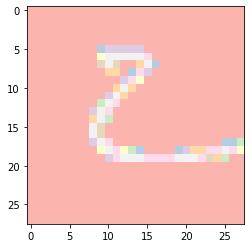

In [ ]:
img = train_imgs[0].reshape((28,28))
plt.imshow(img, cmap="Pastel1")
plt.show()

In [ ]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = train["label"]
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)

### **Defining our custom neural network**

In [ ]:
from scipy.stats import truncnorm

##Activation function
@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
    # return np.maximum(0,x)

activation_function = sigmoid

##normalizing the input
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, 
                     (upp - mean) / sd, 
                     loc=mean, 
                     scale=sd)

class NeuralNetwork:
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate 
        self.create_weight_matrices()

    ##Weight initialization       
    def create_weight_matrices(self):
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, 
                             sd=1, 
                             low=-rad, 
                             upp=rad)
        self.wih = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.who = X.rvs((self.no_of_out_nodes, self.no_of_hidden_nodes))
        
    ##Neural net architecture defining
    def train(self, input_vector, target_vector):
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T
        output_vector1 = np.dot(self.wih, input_vector)
        output_hidden = activation_function(output_vector1)
        output_vector2 = np.dot(self.who, output_hidden)
        output_network = activation_function(output_vector2)
        output_errors = target_vector - output_network
        # update the weights:
        tmp = output_errors * output_network * (1.0 - output_network)     
        tmp = self.learning_rate  * np.dot(tmp, output_hidden.T)
        self.who += tmp
        # calculate hidden errors:
        hidden_errors = np.dot(self.who.T, output_errors)
        # update the weights:
        tmp = hidden_errors * output_hidden * (1.0 - output_hidden)
        self.wih += self.learning_rate * np.dot(tmp, input_vector.T)
        
    def run(self, input_vector):
        input_vector = np.array(input_vector, ndmin=2).T
        output_vector = np.dot(self.wih, input_vector)
        output_vector = activation_function(output_vector)
        output_vector = np.dot(self.who, output_vector)
        output_vector = activation_function(output_vector)
        return output_vector

    ##Functions for model evaluation     
    def confusion_matrix(self, data_array, labels):
        cm = np.zeros((10, 10), int)
        for i in range(len(data_array)):
            res = self.run(data_array[i])
            res_max = res.argmax()
            target = labels[i][0]
            cm[res_max, int(target)] += 1
        return cm    

    def precision(self, label, confusion_matrix):
        col = confusion_matrix[:, label]
        return confusion_matrix[label, label] / col.sum()
    
    def recall(self, label, confusion_matrix):
        row = confusion_matrix[label, :]
        return confusion_matrix[label, label] / row.sum()
        
    
    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs

In [ ]:
image_pixels = image_size * image_size
ANN = NeuralNetwork(no_of_in_nodes = image_pixels, 
                    no_of_out_nodes = 10, 
                    no_of_hidden_nodes = 100,
                    learning_rate = 0.1)
    
for i in range(len(train_imgs)):
    ANN.train(train_imgs[i], train_labels_one_hot[i])

In [ ]:
for i in range(20):
    res = ANN.run(test_imgs[i])
    print(test_labels[i], np.argmax(res), np.max(res))

[6.] 6 0.9926932344588864
[9.] 9 0.9913797185972738
[5.] 5 0.9445238972490092
[7.] 7 0.9851791952708082
[9.] 9 0.978272918756872
[2.] 2 0.9617343090986648
[3.] 3 0.5686407072766435
[3.] 8 0.3601824401597631
[7.] 7 0.9948749594063719
[0.] 0 0.9722486734678008
[6.] 6 0.9632144059847311
[9.] 9 0.9858178540215229
[1.] 1 0.7173582686688664
[8.] 8 0.7352715942113288
[2.] 2 0.8936194717906749
[4.] 4 0.928082021421061
[1.] 1 0.93383851017551
[9.] 9 0.7021827325357576
[4.] 4 0.9023338447346513
[1.] 1 0.5623171464649188


In [ ]:
corrects, wrongs = ANN.evaluate(train_imgs, train_labels)
print("accuracy train: ", corrects / ( corrects + wrongs))
corrects, wrongs = ANN.evaluate(test_imgs, test_labels)
print("accuracy: test", corrects / ( corrects + wrongs))
print(80*"-")
print("Confusion matrix")
print(16*"-")
cm = ANN.confusion_matrix(train_imgs, train_labels)
print(cm)
print(80*"-")
print("Precision and recall scores")
print(25*"-")
for i in range(10):
    print("digit: ", i, "precision: ", ANN.precision(i, cm), "recall: ", ANN.recall(i, cm))
print(80*"-")

accuracy train:  0.9448511904761905
accuracy: test 0.9372619047619047
--------------------------------------------------------------------------------
Confusion matrix
----------------
[[3275    1   51   26   11   28   44   16   34   21]
 [   0 3641    8    8    5    4    3   17   36    8]
 [   1    8 3109   39    9    3    7   38   19    2]
 [   4   23   32 3223    2   49    1   11   62   45]
 [   5    5   32    1 2993   18    6   15   12   44]
 [   4   13    8   91    5 2899   39    6   65   24]
 [  12    3   29    5   30   26 3196    3   24    0]
 [   0    9   31   25    8    2    0 3339    8   38]
 [   7   12   32   18    3    7    2    5 2907    7]
 [   3    7   16   51  150   30    0   78  103 3165]]
--------------------------------------------------------------------------------
Precision and recall scores
-------------------------
digit:  0 precision:  0.9891271519178496 recall:  0.9338465925292273
digit:  1 precision:  0.9782375067168189 recall:  0.9761394101876676
digit:  2 p

In [ ]:
epochs = 3
neural_net = NeuralNetwork(no_of_in_nodes = image_pixels, 
                   no_of_out_nodes = 10, 
                   no_of_hidden_nodes = 100,
                   learning_rate = 0.1)

for epoch in range(epochs):  
    print("epoch: ", epoch)
    for i in range(len(train_imgs)):
        neural_net.train(train_imgs[i], 
                 train_labels_one_hot[i])
  
    corrects, wrongs = neural_net.evaluate(train_imgs, train_labels)
    print("accuracy train: ", corrects / ( corrects + wrongs))
    corrects, wrongs = neural_net.evaluate(test_imgs, test_labels)
    print("accuracy: test", corrects / ( corrects + wrongs))

epoch:  0
accuracy train:  0.94875
accuracy: test 0.9420238095238095
epoch:  1
accuracy train:  0.9650595238095238
accuracy: test 0.9529761904761904
epoch:  2
accuracy train:  0.9719047619047619
accuracy: test 0.9602380952380952


## References:
https://www.python-course.eu/neural_network_mnist.php </br>
https://www.kaggle.com/c/digit-recognizer/data </br>
https://www.python-course.eu/neural_networks_with_dropout.php